In [2]:
from idlelib.iomenu import encoding
from itertools import groupby

import pandas as pd
from scipy.fft import set_global_backend
from sqlalchemy.dialects.mssql.information_schema import columns

In [3]:
##转换文件的编码格式 方便后期遍历阅读
dp_1 = pd.read_csv('./中国大学数据/bcur_2020.csv',encoding='gbk')
dp_1.to_csv('./中国大学数据/bcur_2020.csv',encoding = 'utf-8',index=False)

UnicodeDecodeError: 'gbk' codec can't decode byte 0xad in position 78: illegal multibyte sequence

任务1. 数据分析任务-数据加载与合并(工具:Pandas)
需求1: 读取软科中国大学排名2015年-2024年的数据,并进行合理的合并.合并之后数据集至少包含以下字段:
[排名,学校名称,英文名称,层次,类型,地区,评分],
需求2: 需求1合并之后的数据与全国高校名单及详细指标.xlsx进行二次合并,合并之后数据除了需求1中的字段,还需要有建校时间,隶属.硕士点,博士点,重点实验室,院校类型,办学类型,办学性质.占地面积等字段,合并之后的
数据集名称为all_school

In [4]:
import os
filenames = os.listdir('./中国大学数据/')
names = [i for i in filenames if i.startswith('bcur_')]

In [5]:
dp2 = pd.read_csv('./中国大学数据/bcur_2015.csv')
dp2['年份'] = 2015
year = 2016
for i in names:
    if i != 'bcur_2015.csv':
        dp3 = pd.read_csv(f'./中国大学数据/{i}')
        dp3['年份'] = year
        dp2 = pd.concat([dp2,dp3],ignore_index=True)
        year += 1

In [6]:
data1 = pd.read_excel('./中国大学数据/中国大学综合排名2023.xlsx')
data1['年份'] = 2023
data2 = pd.read_csv('./中国大学数据/中国大学综合排名2024.csv')
data2['年份'] = 2024

In [7]:
data1 = data1.loc[:,['年份','排名','学校名称','英文名称','层次','类型','地区','评分']]
data2 = data2.loc[:,['年份','排名','中文名','英文名','标签','行业','地址','分数']]

In [8]:
data2.columns = data1.columns

In [9]:
dp22 = dp2.loc[:,['年份','ranking','univNameCn','univNameEn','univTags',  'univCategory','province','score']]

In [10]:
columns = ['年份', '排名', '学校名称', '英文名称', '层次', '类型', '地区', '评分']

In [11]:
data = pd.concat([data1,data2],ignore_index=True)

In [12]:
data.columns = dp22.columns = columns

In [13]:
data_all = pd.concat([dp22,data],ignore_index=True)

In [180]:
data_all.head()

,年份,排名,学校名称,英文名称,层次,类型,地区,评分
0,2015,1,清华大学,Tsinghua University,双一流 985 211,理工,北京,94.0
1,2015,2,北京大学,Peking University,双一流 985 211,综合,北京,81.0
2,2015,3,浙江大学,Zhejiang University,双一流 985 211,综合,浙江,80.0
3,2015,4,上海交通大学,Shanghai Jiao Tong University,双一流 985 211,综合,上海,78.0
4,2015,5,复旦大学,Fudan University,双一流 985 211,综合,上海,72.0


In [177]:
data_all.to_csv('./中国大学数据/data_all.csv',encoding = 'utf-8',index=False)

In [14]:
data_d = pd.read_excel('./中国大学数据/全国高校名单及详细指标.xls')

In [15]:
# 去除相同的行数
data_d = data_d.drop_duplicates(subset=['院校名称'])

In [16]:
data_d = data_d.loc[:,['院校名称','建校时间','隶属于','硕士点','重点实验室','院校类型','办学类型','办学性质','占地面积']]
data_d.columns = ['学校名称','建校时间','隶属于','硕士点','重点实验室','院校类型','办学类型','办学性质','占地面积']

In [17]:
all_school = pd.merge(data_all,data_d,on = '学校名称',how = 'left')

In [18]:
all_school.head()

,年份,排名,学校名称,英文名称,层次,类型,地区,评分,建校时间,隶属于,硕士点,重点实验室,院校类型,办学类型,办学性质,占地面积
0,2015,1,清华大学,Tsinghua University,双一流 985 211,理工,北京,94.0,1911.0,教育部,65.0,13.0,综合类,普通本科,公办,6632.0
1,2015,2,北京大学,Peking University,双一流 985 211,综合,北京,81.0,1898.0,教育部,50.0,47.0,综合类,普通本科,公办,7000.0
2,2015,3,浙江大学,Zhejiang University,双一流 985 211,综合,浙江,80.0,1897.0,教育部,62.0,28.0,综合类,普通本科,公办,9335.0
3,2015,4,上海交通大学,Shanghai Jiao Tong University,双一流 985 211,综合,上海,78.0,1896.0,教育部,57.0,22.0,综合类,普通本科,公办,4500.0
4,2015,5,复旦大学,Fudan University,双一流 985 211,综合,上海,72.0,1905.0,教育部,43.0,26.0,综合类,普通本科,公办,603.0


In [19]:
all_school.shape

(5075, 16)

In [189]:
all_school.to_csv('./中国大学数据/all_school.csv',index=False)

## 任务2. 数据分析任务-数据统计分析任务(工具: Matplotlib/Seaborn/Pyecharts都可以)
- 需求3: 利用全国高校名单及详细指标.xlsx 数据集,完成以下分析任务:
- 需求4. 计算各个省份高校的数量,找出TOP10教育大省,计算各个地级市的大学数量,找出TOP10教育城市.可以合理利用可视化方式进行. 柱状图/饼图/
- 需求5. 计算各个省份民办/公办高校的数量,并对TOP10高校完成可视化
- 需求6. 将所给数据按区域划分为7大区,如华南,华北...等.统计各个大区高校的院校数量,院校类型的数量分布情况,办学类型分布情况,以及办学性质分布情况.

In [38]:
##需求4
data_task2 = pd.read_excel('./中国大学数据/全国高校名单及详细指标.xls')
# 去除相同的行数
data_task2 =data_task2.drop_duplicates(subset=['院校名称'])

In [39]:
top10_education_province = data_task2.groupby('省份')['院校名称'].count().sort_values(ascending=False).reset_index().iloc[:10].values.tolist()

In [40]:
top10_education_city = data_task2.groupby('城市')['院校名称'].count().sort_values(ascending=False).reset_index().iloc[:10].values.tolist()

In [41]:
top10_education_province

[['江苏', 169],
 ['山东', 157],
 ['广东', 156],
 ['河南', 149],
 ['四川', 132],
 ['湖北', 130],
 ['湖南', 128],
 ['河北', 126],
 ['安徽', 123],
 ['浙江', 110]]

In [102]:
top10_education_city

[['北京市', 98],
 ['武汉市', 84],
 ['广州市', 83],
 ['重庆市', 71],
 ['成都市', 68],
 ['西安市', 67],
 ['郑州市', 66],
 ['上海市', 64],
 ['天津市', 59],
 ['长沙市', 58]]

In [21]:
from pyecharts import options as opts
from pyecharts.charts import Bar,Scatter,Pie,Timeline
from pyecharts.globals import ThemeType,ChartType,SymbolType,JsCode

In [46]:
# from pyecharts.globals import CurrentConfig  # 加载全局配置
# CurrentConfig.ONLINE_HOST = "http://127.0.0.1:8000/assets/"  # 设定静态资源地址
# from pyecharts.datasets import register_url  # 部分地图文件注册
# # 注册本地服务器的地图数据源
# register_url("http://127.0.0.1:8000/") 

In [42]:
itemstyle = {
    'normal': {
        'color': JsCode("""new echarts.graphic.LinearGradient(0, 0, 1, 1, [
          { offset: 0, color: 'rgb(255, 191, 0)' },
          { offset: 1, color: 'rgb(224, 62, 76)' }
        ],)"""),
        'barBorderRadius': [20,20,20,20],      #  柱子的四个角圆角设计
        'shadowColor':'rgba(108,80,243,0.9)', # 阴影的颜色
        'shadowBlur':5, # 阴影的宽度
        'width': 4,
    }
}

In [31]:
itemstyle_pie = {
    'normal': {
        'borderRadius':15,
        'borderWidth':.5,
        'borderColor':'auto',
    }
}

In [43]:
bar=(Bar(init_opts=opts.InitOpts(theme=ThemeType.DARK))
    .add_xaxis([i[0] for i in top10_education_province])
    .add_yaxis(series_name='TOP10教育大省',y_axis=[i[1] for i in top10_education_province],
                label_opts=opts.LabelOpts(position='top',formatter='{c}所',
                                          color='white',font_weight='bold'),
               itemstyle_opts=itemstyle,
                category_gap='30',## 同一序列柱间的距离
               )
     .set_global_opts(
         title_opts=opts.TitleOpts(title='全国大学数量前十省份', pos_left='center'),
         legend_opts=opts.LegendOpts(pos_top='5%',
                                    textstyle_opts=opts.TextStyleOpts(color='auto'),  # 文字样式
                                    ),
         tooltip_opts=opts.TooltipOpts(trigger='axis',axis_pointer_type='shadow',
                                      ),
         yaxis_opts=opts.AxisOpts(
                                 axislabel_opts=opts.LabelOpts(font_weight='bold',color='white',##粗体白色
                                                                ),
                                 )
     )
    )
bar.render('./result/需求4教育大省.html')

'C:\\Users\\wang\\Desktop\\pyLearn\\作业\\work_05\\result\\需求4教育大省.html'

In [48]:
from pyecharts_snapshot.main import make_a_snapshot
pie = (Pie(init_opts=opts.InitOpts(theme=ThemeType.CHALK))
    .add(series_name='Top教育城市', data_pair=top10_education_city,
         radius=['30%','80%'], # 饼图内半径和外半径
         rosetype='area',  # 否展示成南丁格尔图
         label_opts=opts.LabelOpts(formatter='{b}:{c}\n百分占比{d}%'), # 标签配置
         itemstyle_opts=itemstyle_pie, # 图元样式配置
         emphasis_opts=opts.EmphasisOpts( is_show_label_line=True,focus='series',
                    label_opts=opts.LabelOpts(font_size=20,font_weight='bold')
                                        ), #高亮多边形配置
        )
#     .set_colors()
    .set_global_opts(tooltip_opts=opts.TooltipOpts(trigger='item'))
      )
pie.options['series'][0]['padAngle'] = 1 # 设定每个饼图各个饼块之间的距离
pie.render('./result/需求4教育城市.html')

'C:\\Users\\wang\\Desktop\\pyLearn\\作业\\work_05\\result\\需求4教育城市.html'

In [37]:
from pyecharts.charts import Bar
from pyecharts_snapshot.main import make_a_snapshot

bar = Bar()
bar.add_xaxis(["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"])
bar.add_yaxis("商家 A", [5, 20, 36, 10, 75, 90])
# 设置输出文件名和格式
make_a_snapshot('render.html', 'output.png')

,省份,城市,区域,院校名称,建校时间,隶属于,985工程,211工程,双一流,强基,...,占地面积,院校类型,办学类型,办学性质,电子邮箱,地址,官方网址,官方电话,简介,校区
0,陕西,西安市,碑林区,西北大学,1902,陕西省,,是,是,,...,2360,综合类,普通本科,公办,zsb@nwu.edu.cn,"长安校区：西安市长安区郭杜教育科技产业区学府大道1号,太白校区：西安市太白北路229号",http://www.nwu.edu.cn/,029-88302211,西北大学肇始于1902年的陕西大学堂和京师大学堂速成科仕学馆。1912年始称西北大学。192...,长安校区
2,湖北,武汉市,武昌区,武汉大学,1893,教育部,是,是,是,是,...,5195,综合类,普通本科,公办,wlxxs@whu.edu.cn,湖北省武汉市武昌区八一路299号,http://www.whu.edu.cn/,027-68754231,江城多山，珞珈独秀;山上有黉，武汉大学。武汉大学是国家教育部直属重点综合性大学，是国家“98...,
3,内蒙古,呼和浩特市,赛罕区,内蒙古大学,1957,内蒙古自治区,,是,是,,...,3802,综合类,普通本科,公办,ndzs2008@imu.edu.cn,"北校区：呼和浩特市赛罕区大学西街235号,南校区：呼和浩特市玉泉区昭君路24号,满洲里校区：...",http://www.imu.edu.cn/,"0471-4993105,0471-4993164",【历史沿革】内蒙古大学位于内蒙古自治区首府、历史文化名城呼和浩特市，距北京400余公里，是中...,北校区
6,湖南,长沙市,岳麓区,中南大学,1976,教育部,是,是,是,,...,3597,综合类,普通本科,公办,admi@hnu.cn,湖南省长沙市岳麓区麓山南路麓山门,http://www.hnu.edu.cn/,"0731-88823560,0731-88823067,0731-88823578,0731...",湖南大学位于中国历史文化名城长沙，校区坐落在湘江之滨、岳麓山下，享有“千年学府，百年名校”之...,
7,云南,昆明市,呈贡区,云南大学,1922,云南省,,是,是,,...,4364,综合类,普通本科,公办,zszx@ynu.edu.cn,云南省昆明市翠湖北路2号,http://www.ynu.edu.cn/,"0871-65033819,0871-65032173,0871-65939873",云南大学始建于1922年，时为私立东陆大学，1934年更名为省立云南大学，1938年改为国立...,


In [61]:
##需求5
data_both = data_task2.groupby(by = ['省份','办学性质'])['院校名称'].count().reset_index()

In [76]:
data_both.head()

,省份,办学性质,院校名称
0,上海,中外合作办学,2
1,上海,公办,45
2,上海,民办,17
3,云南,公办,60
4,云南,民办,21


In [83]:
data_private = data_both[data_both['办学性质'] == '公办'][['省份','院校名称']].sort_values(by = '院校名称',ascending=False).iloc[:10].values.tolist()

In [84]:
data_public = data_both[data_both['办学性质'] == '民办'][['省份','院校名称']].sort_values(by = '院校名称',ascending=False).iloc[:10].values.tolist()

In [85]:
data_public

[['广东', 50],
 ['四川', 49],
 ['江苏', 46],
 ['湖北', 43],
 ['山东', 41],
 ['河南', 40],
 ['福建', 36],
 ['河北', 34],
 ['安徽', 31],
 ['浙江', 31]]

In [94]:
pie=(Pie(init_opts=opts.InitOpts(theme=ThemeType.DARK,width='100%',height='95vh'))
    .add(series_name='民办高校',data_pair=data_private,
        rosetype='area', 
        radius=['20%','40%'],
        center=['20%','55%'],
        label_opts=opts.LabelOpts(formatter='{b}:{c}\n百分占比{d}%'),
        itemstyle_opts=itemstyle_pie,
        )
     .add(series_name='公办高校',data_pair=data_public,
        rosetype='area', 
        radius=['20%','40%'],
        center=['75%','55%'],
        label_opts=opts.LabelOpts(formatter='{b}:{c}\n百分占比{d}%'),
        itemstyle_opts=itemstyle_pie,
        )
     .set_global_opts(
         title_opts=[
              dict(text='公办',top='53%',left='19%'),
              dict(text='民办',top='53%',left='74%'),
         ],
         legend_opts=opts.LegendOpts(pos_top='5%'),
         tooltip_opts=opts.TooltipOpts(trigger='item'),
                      )
   )
pie.render('./result/需求5.html')

'C:\\Users\\wang\\Desktop\\pyLearn\\作业\\work_05\\result\\需求5.html'

In [99]:
# 需求6
dicts1 = {
    '东北': ['黑龙江', '吉林', '辽宁'],
    '华北': ['北京', '天津', '河北', '山西', '内蒙古'],
    '华东': ['山东', '江苏', '安徽', '上海', '浙江', '福建', '江西'],
    '华中': ['河南', '湖北', '湖南'],
    '华南': ['广东', '广西', '海南'],
    '西南': ['重庆', '四川', '云南', '贵州', '西藏'],
    '西北': ['陕西', '甘肃', '青海', '宁夏', '新疆'],
}
dicts2 = {}
dicts2.update({i:k for k, v in dicts1.items() for i in v})

In [102]:
data_task2['区域'] = data_task2['省份'].map(dicts2)

In [114]:
school_count = data_task2.groupby('区域')['院校名称'].count().reset_index().values.tolist()

In [115]:
school_type_count = data_task2.groupby('区域')['院校类型'].count().reset_index().values.tolist()

In [116]:
found_school_count = data_task2.groupby('区域')['办学类型'].count().reset_index().values.tolist()

In [117]:
nature_school_count = data_task2.groupby('区域')['办学性质'].count().reset_index().values.tolist()

In [135]:
pie=(Pie(init_opts=opts.InitOpts(theme=ThemeType.DARK,width='100%',height='95vh'))
    .add(series_name='院校数量',data_pair=school_count,
        #rosetype='area', 
        radius=['20%','40%'],
        center=['20%','25%'],
        label_opts=opts.LabelOpts(formatter='{b}:{c}\n百分占比{d}%'),
        itemstyle_opts=itemstyle_pie,
        )
     .add(series_name='院校类型',data_pair=school_type_count,
        #rosetype='area', 
        radius=['20%','40%'],
        center=['75%','25%'],
        label_opts=opts.LabelOpts(formatter='{b}:{c}\n百分占比{d}%'),
        itemstyle_opts=itemstyle_pie,
        )
    .add(series_name='办学类型',data_pair=found_school_count,
        #rosetype='area', 
        radius=['20%','40%'],
        center=['20%','72%'],
        label_opts=opts.LabelOpts(formatter='{b}:{c}\n百分占比{d}%'),
        itemstyle_opts=itemstyle_pie,
        )
    .add(series_name='办学性质',data_pair=nature_school_count,
        #rosetype='area', 
        radius=['20%','40%'],
        center=['75%','72%'],
        label_opts=opts.LabelOpts(formatter='{b}:{c}\n百分占比{d}%'),
        itemstyle_opts=itemstyle_pie,
        )
     .set_global_opts(
         title_opts=[
              dict(text='院校数量',top='23%',left='18%'),
              dict(text='院校类型',top='23%',left='73%'),
              dict(text='办学类型',top='70%',left='18%'),
              dict(text='办学性质',top='70%',left='73%'),
         ],
         legend_opts=opts.LegendOpts(pos_top='5%'),
         tooltip_opts=opts.TooltipOpts(trigger='item'),
                      )
   )
pie.render('./result/需求6.html')

'C:\\Users\\wang\\Desktop\\pyLearn\\作业\\work_05\\result\\需求6.html'

# 任务3. 数据分析任务-相关性分析(工具:Seaborn)
- 需求7: 利用中国大学综合排名2023.xlsx数据集,计算该数据集中下述字段
排名,评分,办学层次,学科水平,办学资源,师资规模与结构,人才培养,科学研究,服务社会,高端人才,重大项目与成果,国际竞争力. 之间是否存在相关性.可使用seaborn完成

In [136]:
data_2013 = pd.read_excel('./中国大学数据/中国大学综合排名2023.xlsx')
data_2013  =data_2013.loc[:,['排名', '评分', '办学层次', '学科水平', '办学资源', '师资规模与结构', 
                            '人才培养', '科学研究', '服务社会', '高端人才', '重大项目与成果', '国际竞争力']].corr()

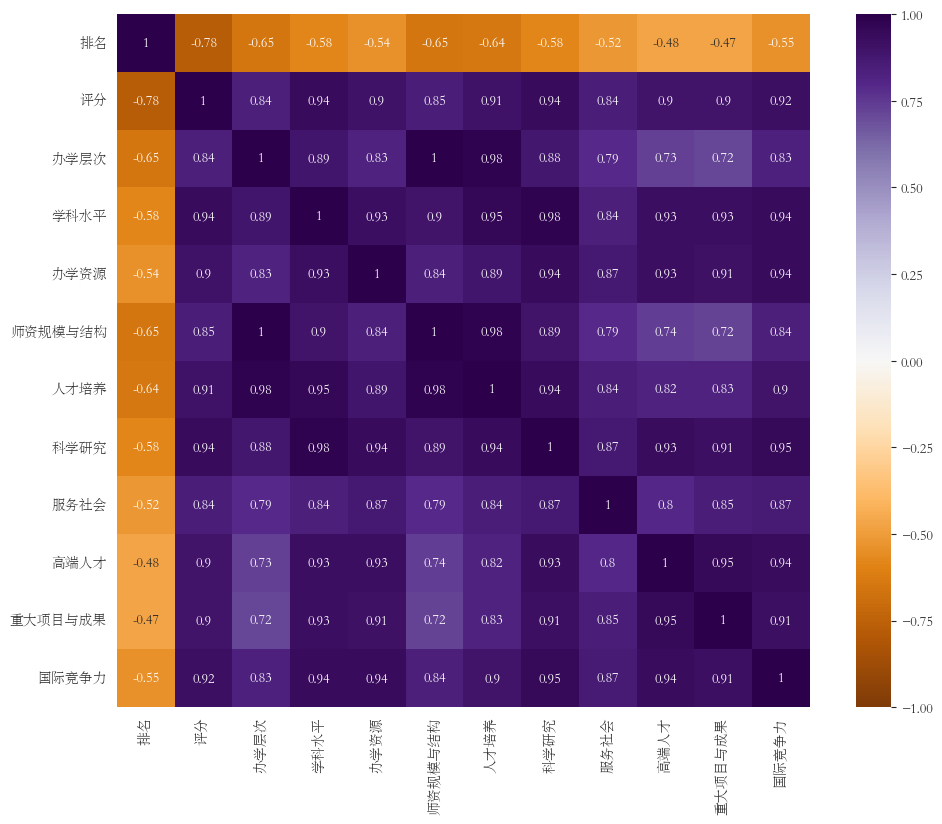

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'STsong'
plt.figure(figsize=(12, 9))
sns.heatmap(data=data_2013,
            annot=True, 
            cmap='PuOr', 
            vmin=-1, 
            vmax=1, 
            center=0,
            square=True,)
plt.savefig('./result/需求7.jpg')

In [246]:
school_211 = all_school.loc[all_school['层次'].apply(lambda x:'211' in str(x))]

In [258]:
count_211 = school_211.groupby(by = ['年份','地区'])['学校名称'].count().reset_index()

In [259]:
count_211

,年份,地区,学校名称
0,2015,上海,7
1,2015,内蒙古,1
2,2015,北京,16
3,2015,吉林,2
4,2015,四川,4
...,...,...,...
289,2024,辽宁,4
290,2024,重庆,2
291,2024,陕西,7
292,2024,青海,1


In [260]:
data_pair = {}
for i in range(2015, 2025):
    data_pair[i] = count_211[count_211['年份'] == i][[
        '地区', '学校名称'
    ]].sort_values(by='学校名称',ascending=False).values.tolist()

In [280]:
timeline = Timeline()
for i in range(2015, 2025):
    pie = (Pie(init_opts=opts.InitOpts(theme=ThemeType.CHALK))
    .add(series_name='历年211的数量', data_pair=data_pair[i],
         radius=['30%','80%'], # 饼图内半径和外半径
         center=['50%','60%'],
         #rosetype='radius',  # 否展示成南丁格尔图
         label_opts=opts.LabelOpts(formatter='{b}:{c}'), # 标签配置
         itemstyle_opts=itemstyle_pie, # 图元样式配置
         emphasis_opts=opts.EmphasisOpts( is_show_label_line=True,focus='series',
                    label_opts=opts.LabelOpts(font_size=20,font_weight='bold')
                                        ), #高亮多边形配置
        )
    .set_global_opts(tooltip_opts=opts.TooltipOpts(trigger='item'))
      )
    pie.options['series'][0]['padAngle'] = 1 # 设定每个饼图各个饼块之间的距离
    timeline.add(pie,i)
timeline.add_schema(play_interval=1000)
timeline.render('./result/需求8.html')

'C:\\Users\\wang\\Desktop\\pyLearn\\作业\\work_05\\result\\需求8.html'

In [28]:
bar_itemstyle1 = {
    'normal': {
        'color': JsCode("""new echarts.graphic.LinearGradient(0, 0, 1, 1, [
          { offset: 0, color: 'rgb(49, 141, 234' },
          { offset: 1, color: 'rgb(224, 62, 76)' }
        ],)"""),
        'barBorderRadius': [10,10,10,10],      #  柱子的四个角圆角设计
        'shadowColor':'rgba(108,80,243,0.9)', # 阴影的颜色
        'shadowBlur':5, # 阴影的宽度
    }
}

In [29]:
timeline = Timeline()
for i in range(2015, 2025):
    data = all_school[all_school['年份'] == i].sort_values(by = '排名').reset_index().loc[:20].sort_values(by = '排名', ascending=False).reset_index(drop=True)
    bar = (
        Bar()
        .add_xaxis(data['学校名称'].tolist())
        .add_yaxis("排名", data['排名'].tolist(),
                   itemstyle_opts=bar_itemstyle1)
        .reversal_axis()
        .set_global_opts(
            title_opts=opts.TitleOpts(title=f"{i}年中国大学综合排名TOP20"),
            xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-45)),
            yaxis_opts=opts.AxisOpts(),
        )
    )
    timeline.add(bar, i)
timeline.add_schema(play_interval=1000, is_auto_play=True)
timeline.render('./result/需求9.html')

'C:\\Users\\wang\\Desktop\\pyLearn\\作业\\work_05\\result\\需求9.html'

In [36]:
timeline = Timeline()
for i in range(2015, 2025):
    data = all_school[all_school['年份'] == i].sort_values(by = '排名').reset_index().loc[:20].sort_values(by = '排名', ascending=False).reset_index(drop=True)
    pie = (Pie()
           .add(series_name='排序饼图',data_pair=data[['学校名称','排名']].values.tolist(),
                radius=['30%','80%'], center=['50%','60%'],
                itemstyle_opts = itemstyle_pie,
                rosetype='area',label_opts=opts.LabelOpts(formatter='{b}第{c}'),
                )
            .set_global_opts(tooltip_opts=opts.TooltipOpts(trigger='item'))
           )
    
    timeline.add(pie, i)
timeline.add_schema(play_interval=1000)
timeline.render('./result/需求10.html')

'C:\\Users\\wang\\Desktop\\pyLearn\\作业\\work_05\\result\\需求10.html'

In [284]:
import pandas as pd
from pyecharts.charts import Map
from pyecharts import options as opts
dicts1 = {
    '东北': ['黑龙江', '吉林', '辽宁'],
    '华北': ['北京', '天津', '河北', '山西', '内蒙古'],
    '华东': ['山东', '江苏', '安徽', '上海', '浙江', '福建', '江西'],
    '华中': ['河南', '湖北', '湖南'],
    '华南': ['广东', '广西', '海南'],
    '西南': ['重庆', '四川', '云南', '贵州', '西藏'],
    '西北': ['陕西', '甘肃', '青海', '宁夏', '新疆'],
}
dicts2 = {i: k for k, v in dicts1.items() for i in v}
data_p4 = data_task2.groupby('区域')['院校名称'].count().reset_index().values.tolist()

maps = (
    Map()
    .add("高校数量", data_p4, maptype="china")  # Use a valid map type
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(max_=10),  # Adjust max value
        legend_opts=opts.LegendOpts(selected_mode='single', pos_top="10%")
    )
)

maps.render()

'C:\\Users\\wang\\Desktop\\pyLearn\\作业\\work_05\\render.html'